 #  A Whale off the Port(folio)


In [153]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [154]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [155]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [156]:
# Drop nulls
whale_df.dropna(inplace=True)
# whale_df #taking a look at first row

#double check for null:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [157]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_returns,  index_col="Date", parse_dates=True)
algo_df.sort_index(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [158]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [159]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [160]:
# Reading S&P 500 Closing Prices
sp500_history = Path("Resources/sp500_history.csv")

sp500_df = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [161]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [162]:
# Fix Data Types

# remove the dollar sign:
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
#sp500_df # making sure $ was eliminated


# changing "close" from object to float:
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [163]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()   #error: unsupported operand type(s) for /: 'str' and 'str'
sp500_df.head()                           # didn't remove $, read as a string.     

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [164]:
#troubleshooting, forget to set the datetime as index when passing data through pandas
sp500_df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [165]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df

#double checking for nulls:
#sp500_df.isnull().sum()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [166]:
# Rename Column
sp500_df = sp500_df.rename(columns={"Close": "SP_500"})
sp500_df

#or
#sp500_df.columns = ["SP_500"]
#sp500_df

,SP_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [167]:
# validating data types:
sp500_df.dtypes

#checking for nulls:
sp500_df.isnull().sum()

SP_500    0
dtype: int64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [168]:
# Concatenate all DataFrames into a single DataFrame
combined = pd.concat([sp500_df, whale_df, algo_df], axis="columns", join="inner")
combined

,SP_500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-16,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-18,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

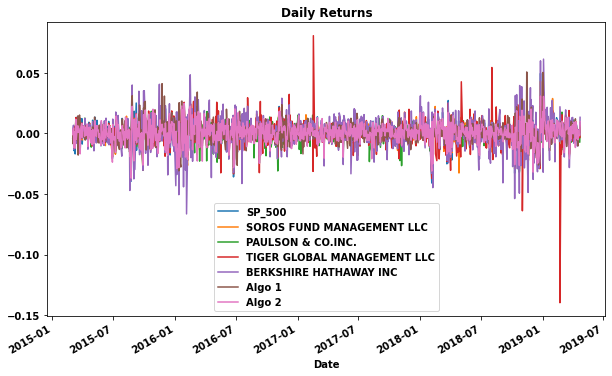

In [169]:
# Plot daily returns
combined.plot(title="Daily Returns", figsize=(10,6))

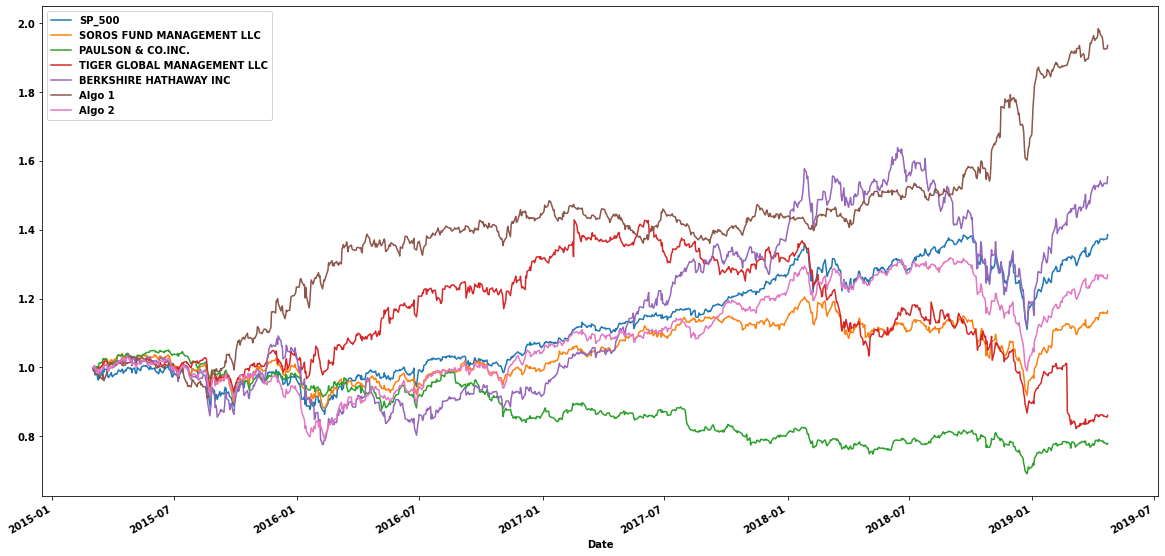

In [170]:
# Plot cumulative returns
cum_returns = (1 + combined).cumprod()
cum_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

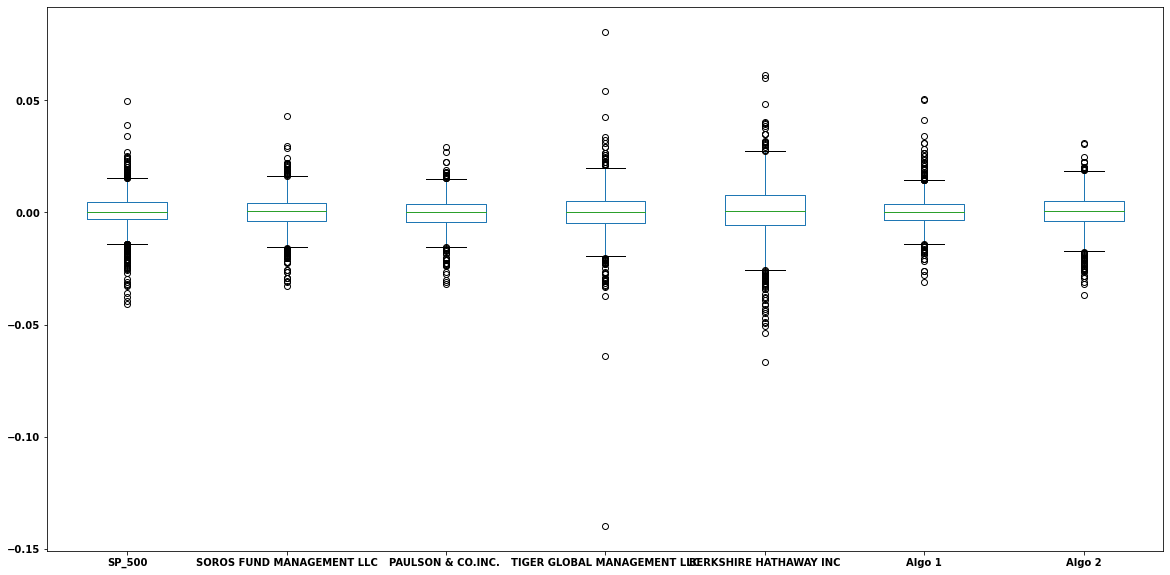

In [171]:
# Box plot to visually show risk
combined.plot.box(figsize=(20,10))

In [172]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# Determine which portfolios are riskier than the S&P 500

daily_std = combined.std().sort_values(ascending=True)
daily_std

#TIGER GLOBAL MANAGEMENT LLC    0.010894
#BERKSHIRE HATHAWAY INC         0.012919 are more risk than SP_500, higher std.

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP_500                         0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [206]:
# Calculate the annualized standard deviation (252 trading days)
Annual_std = daily_std * np.sqrt(252)
Annual_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
SP_500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

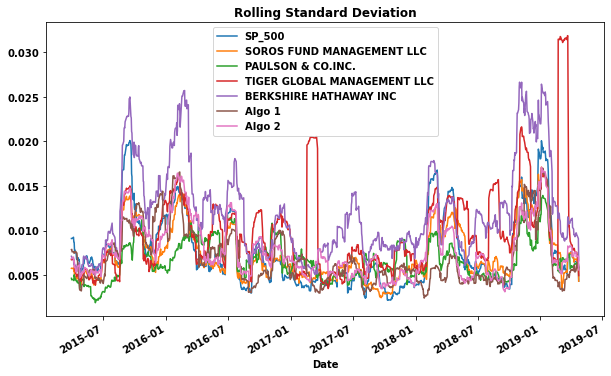

In [174]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

rolling_std = combined.rolling(window=21).std()
rolling_std.plot(figsize=(10,6), title="Rolling Standard Deviation")

In [175]:
# Construct a correlation table
correlation = combined.corr()
correlation

,SP_500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP_500,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
SOROS FUND MANAGEMENT LLC,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


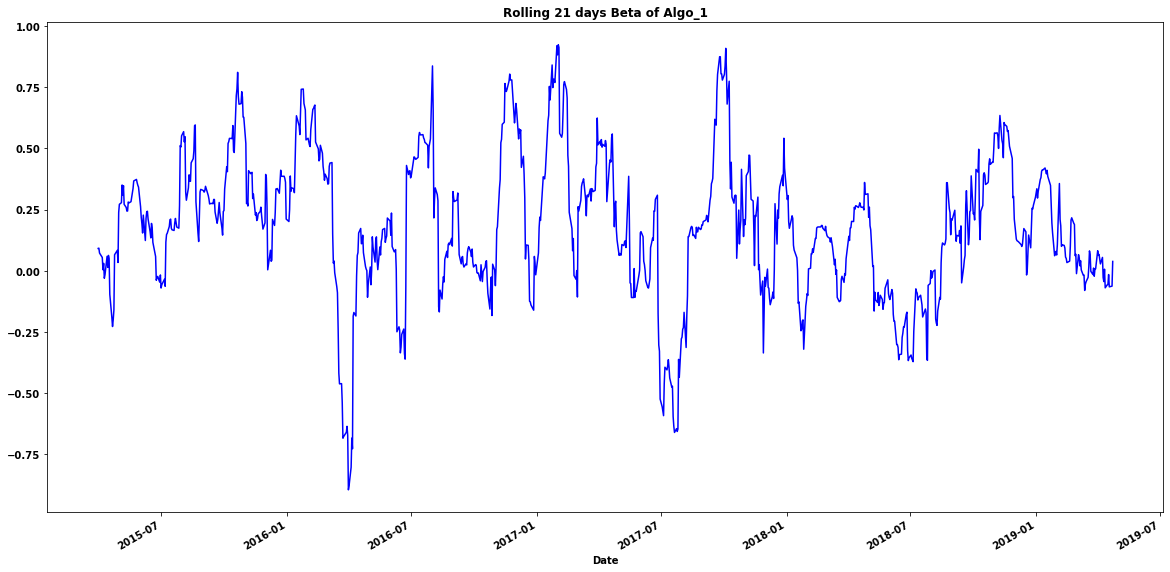

In [176]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# calculate rolling covraince for algo portfolio(mentioned single portfolio but the plot in starter_file shows "BERKSHIRE HATHAWAY INC" single stock)
rolling_algo1 = combined["Algo 1"].rolling(window=21).cov(combined["SP_500"])

# calculate variance 
rolling_sp500 = combined["SP_500"].rolling(window=21).var()

# calculate rolling beta:
rolling_alog1_beta = rolling_algo1 / rolling_sp500

# plot the portfolio treand
rolling_alog1_beta.plot(figsize=(20, 10), color= "blue", title="Rolling 21 days Beta of Algo_1")


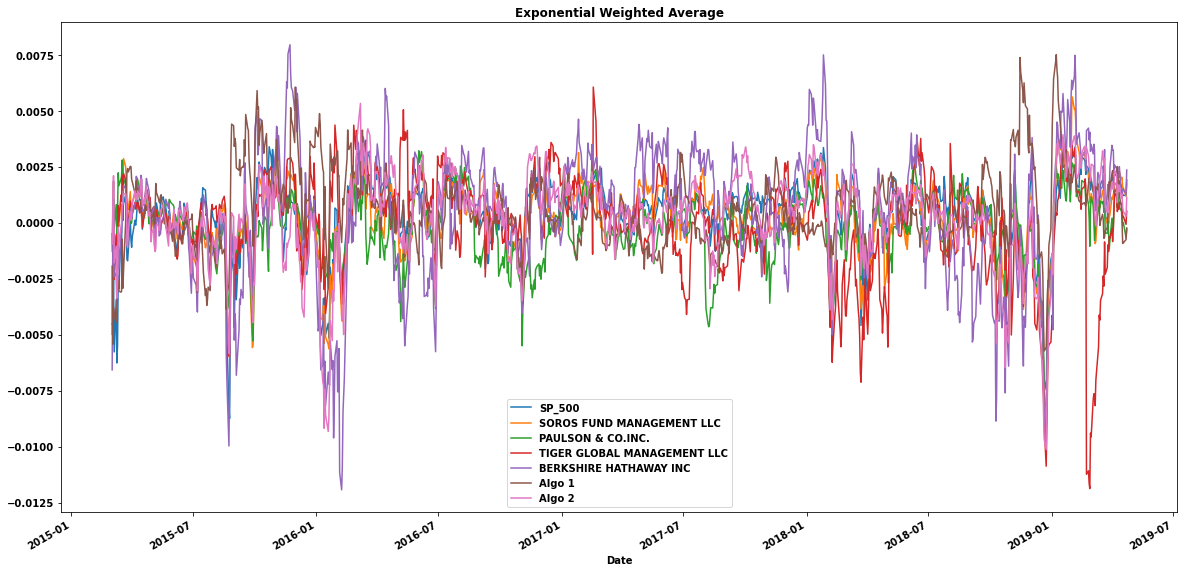

In [177]:
# Calculate a rolling window using the exponentially weighted moving average. 
combined_ewm = combined.ewm(span=21).mean()
combined_ewm.plot(figsize=(20,10), title="Exponential Weighted Average")

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [178]:
# Calculate annualized Sharpe Ratios

sharpe_ratio = (combined.mean() * 252) / (combined.std() * np.sqrt(252))
sharpe_ratio 

SP_500                         0.648267
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

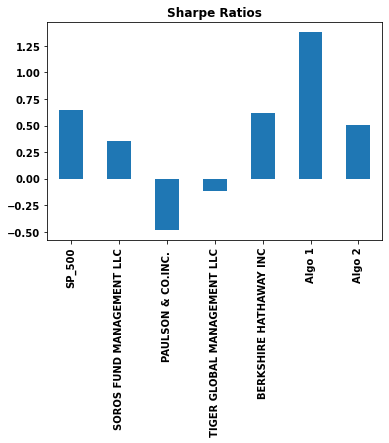

In [179]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

1-Algo. strategies outperform both SP500 & wales.
the market:
SP_500                       65%
whale_portfolio
SOROS FUND MANAGEMENT LLC    36%
PAULSON & CO.INC.           -48% 
TIGER GLOBAL MANAGEMENT LLC -12%
BERKSHIRE HATHAWAY INC       62% 
ALgo_portfolio
Algo 1                       138%
Algo 2                       50%

2- Algo_1 has the largest spread while SOROS FUND MGMT has the smallest spread.

3- TIGER GLOBAL MANAGEMENT LLC & BERKSHIRE HATHAWAY INC are the risky stock among all stocks as their standard deviation is higher than SP_500         


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [180]:
# Read the first stock
file_path = Path("Resources/STX.csv")
stx_df = pd.read_csv(file_path, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE").sort_index()
stx_df

,Symbol,NOCP
Trade DATE,,
2015-04-15,STX,56.67
2015-04-16,STX,55.96
2015-04-17,STX,57.43
2015-04-20,STX,59.14
2015-04-21,STX,58.41
...,...,...
2019-12-23,STX,60.37
2019-12-24,STX,59.49
2019-12-26,STX,59.92


In [181]:
# Read the second stock
file_path=Path("Resources/GE.csv")
ge_df = pd.read_csv(file_path, index_col="Trade DATE", parse_dates=True,infer_datetime_format=True).sort_index()
ge_df

,Symbol,NOCP
Trade DATE,,
2015-04-15,GE,27.46
2015-04-16,GE,27.28
2015-04-17,GE,27.25
2015-04-20,GE,27.02
2015-04-21,GE,26.62
...,...,...
2019-12-23,GE,11.16
2019-12-24,GE,11.19
2019-12-26,GE,11.23


In [182]:
# Read the third stock
file_path = Path("Resources/VNO.csv")
vno_df=pd.read_csv(file_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True).sort_index()
vno_df

,Symbol,NOCP
Trade DATE,,
2015-04-15,VNO,86.87
2015-04-16,VNO,87.00
2015-04-17,VNO,86.46
2015-04-20,VNO,86.30
2015-04-21,VNO,86.47
...,...,...
2019-12-23,VNO,67.01
2019-12-24,VNO,67.21
2019-12-26,VNO,67.91


In [183]:
# Concatenate all stocks into a single DataFrame
concat_file = pd.concat([ge_df, stx_df, vno_df], axis="rows", join="inner" )
concat_file

,Symbol,NOCP
Trade DATE,,
2015-04-15,GE,27.46
2015-04-16,GE,27.28
2015-04-17,GE,27.25
2015-04-20,GE,27.02
2015-04-21,GE,26.62
...,...,...
2019-12-23,VNO,67.01
2019-12-24,VNO,67.21
2019-12-26,VNO,67.91


In [184]:
# Reset the index
concat_file.reset_index()

,Trade DATE,Symbol,NOCP
0,2015-04-15,GE,27.46
1,2015-04-16,GE,27.28
2,2015-04-17,GE,27.25
3,2015-04-20,GE,27.02
4,2015-04-21,GE,26.62
...,...,...,...
3556,2019-12-23,VNO,67.01
3557,2019-12-24,VNO,67.21
3558,2019-12-26,VNO,67.91
3559,2019-12-27,VNO,65.89


In [185]:
# Pivot so that each column of prices represents a unique symbol
portfolio = concat_file.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head()

Symbol,GE,STX,VNO
Trade DATE,,,
2015-04-15,27.46,56.67,86.87
2015-04-16,27.28,55.96,87.00
2015-04-17,27.25,57.43,86.46
2015-04-20,27.02,59.14,86.30
2015-04-21,26.62,58.41,86.47


In [186]:
# Drop Nulls
portfolio.dropna(inplace=True)
portfolio.isnull().sum()

Symbol
GE     0
STX    0
VNO    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [187]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

weighted_returns = returns.dot(weights)
weighted_returns.dropna(inplace=True)

weighted_returns

Trade DATE
2015-04-16   -0.005862
2015-04-17    0.006321
2015-04-20    0.006495
2015-04-21   -0.008393
2015-04-22    0.002990
                ...   
2019-12-23    0.008620
2019-12-24   -0.002968
2019-12-26    0.007073
2019-12-27   -0.013291
2019-12-30   -0.005869
Length: 1186, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [189]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
integerated_returns= pd.concat([weighted_returns, combined], axis="columns", join="inner")
integerated_returns

,0,SP_500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
2015-04-16,-0.005862,-0.000778,-0.002111,-0.003232,0.000510,0.000102,-0.002671,0.001667
2015-04-17,0.006321,-0.011311,-0.009432,-0.002201,-0.010617,-0.013046,-0.000194,-0.010692
2015-04-20,0.006495,0.009235,-0.000508,0.001239,0.006252,0.000780,0.001468,0.004799
2015-04-21,-0.008393,-0.001481,0.004266,0.004629,0.004879,0.007805,0.004552,-0.001794
2015-04-22,0.002990,0.005088,0.000974,-0.000827,0.008591,0.003768,0.001458,0.004774
...,...,...,...,...,...,...,...,...
2019-04-16,0.007602,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.004637,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-18,0.013826,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-22,-0.006342,0.001012,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936


In [190]:
# give a name to custom portfolio:
integerated_returns = integerated_returns.rename(columns={0 : "Custom"})
integerated_returns


,Custom,SP_500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
2015-04-16,-0.005862,-0.000778,-0.002111,-0.003232,0.000510,0.000102,-0.002671,0.001667
2015-04-17,0.006321,-0.011311,-0.009432,-0.002201,-0.010617,-0.013046,-0.000194,-0.010692
2015-04-20,0.006495,0.009235,-0.000508,0.001239,0.006252,0.000780,0.001468,0.004799
2015-04-21,-0.008393,-0.001481,0.004266,0.004629,0.004879,0.007805,0.004552,-0.001794
2015-04-22,0.002990,0.005088,0.000974,-0.000827,0.008591,0.003768,0.001458,0.004774
...,...,...,...,...,...,...,...,...
2019-04-16,0.007602,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.004637,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-18,0.013826,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-22,-0.006342,0.001012,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936


In [191]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
integerated_returns.dropna(inplace=True)
integerated_returns.head()
#integerated_returns.isnull().sum()

,Custom,SP_500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
2015-04-16,-0.005862,-0.000778,-0.002111,-0.003232,0.000510,0.000102,-0.002671,0.001667
2015-04-17,0.006321,-0.011311,-0.009432,-0.002201,-0.010617,-0.013046,-0.000194,-0.010692
2015-04-20,0.006495,0.009235,-0.000508,0.001239,0.006252,0.000780,0.001468,0.004799
2015-04-21,-0.008393,-0.001481,0.004266,0.004629,0.004879,0.007805,0.004552,-0.001794
2015-04-22,0.002990,0.005088,0.000974,-0.000827,0.008591,0.003768,0.001458,0.004774


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [192]:
# Risk
volatility = integerated_returns.std() * np.sqrt(252)
volatility

Custom                         0.215786
SP_500                         0.136151
SOROS FUND MANAGEMENT LLC      0.126451
PAULSON & CO.INC.              0.112437
TIGER GLOBAL MANAGEMENT LLC    0.174851
BERKSHIRE HATHAWAY INC         0.207427
Algo 1                         0.121379
Algo 2                         0.133398
dtype: float64

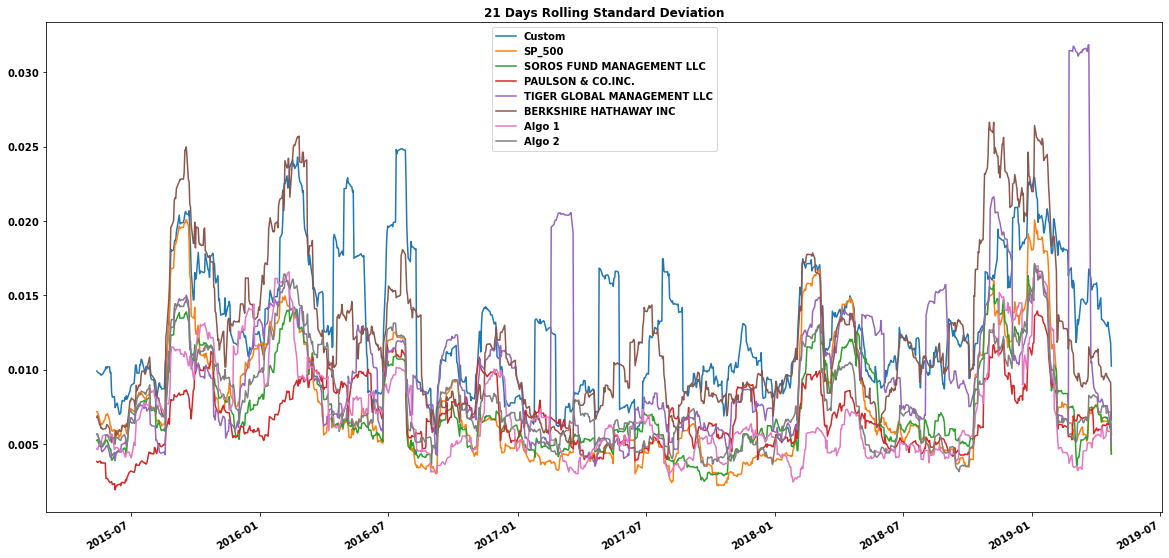

In [193]:
# Rolling
integerated_returns.rolling(window=21).std().plot(figsize=(20,10), title="21 Days Rolling Standard Deviation")

In [194]:
# Annualized Sharpe Ratios
sharpe_ratio = (integerated_returns.mean() * 252) / (integerated_returns.std() * np.sqrt(252))
sharpe_ratio

Custom                        -0.326544
SP_500                         0.673947
SOROS FUND MANAGEMENT LLC      0.285647
PAULSON & CO.INC.             -0.577511
TIGER GLOBAL MANAGEMENT LLC   -0.152835
BERKSHIRE HATHAWAY INC         0.598615
Algo 1                         1.397253
Algo 2                         0.460442
dtype: float64

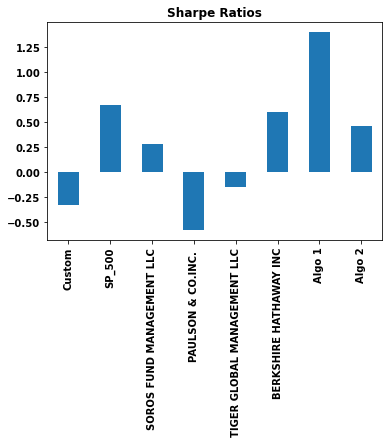

In [195]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

In [196]:
# Create a correlation analysis
integerated_returns.corr()

,Custom,SP_500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Custom,1.000000,0.644564,0.588548,0.472639,0.387055,0.477418,0.186068,0.626371
SP_500,0.644564,1.000000,0.838044,0.670221,0.620826,0.752826,0.284022,0.859352
SOROS FUND MANAGEMENT LLC,0.588548,0.838044,1.000000,0.698632,0.557833,0.754136,0.325810,0.826863
PAULSON & CO.INC.,0.472639,0.670221,0.698632,1.000000,0.431012,0.543751,0.273773,0.677496
TIGER GLOBAL MANAGEMENT LLC,0.387055,0.620826,0.557833,0.431012,1.000000,0.421468,0.165754,0.503357
BERKSHIRE HATHAWAY INC,0.477418,0.752826,0.754136,0.543751,0.421468,1.000000,0.295885,0.686717
Algo 1,0.186068,0.284022,0.325810,0.273773,0.165754,0.295885,1.000000,0.294879
Algo 2,0.626371,0.859352,0.826863,0.677496,0.503357,0.686717,0.294879,1.000000


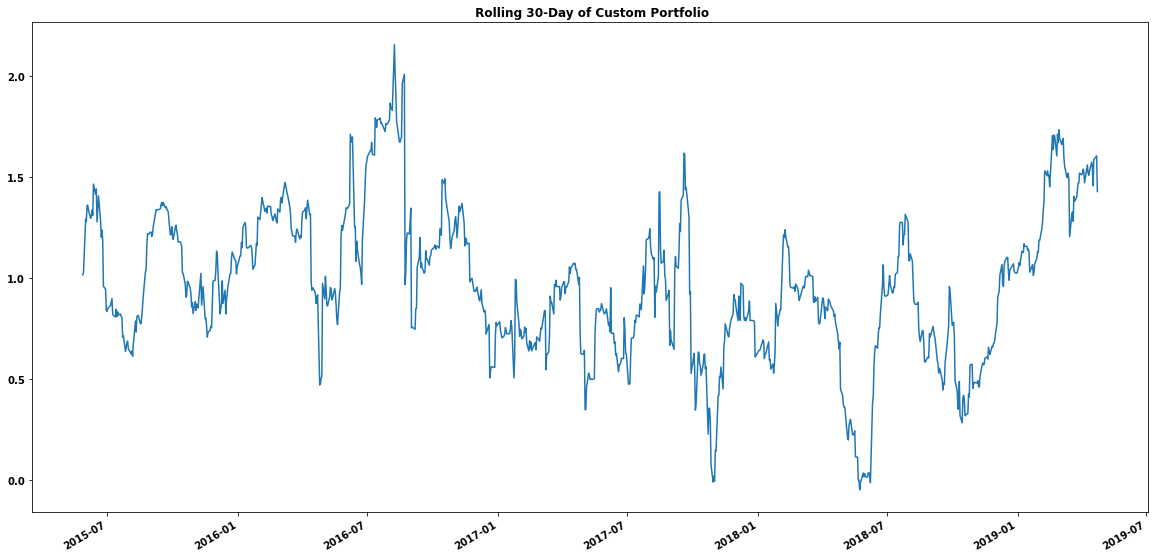

In [204]:
# Beta

# calculate rolling covariance of custom portfolio aganist SOROS FUND MANAGEMENT LLC:
rolling_covariance = integerated_returns["Custom"].rolling(window=30).cov(integerated_returns["SOROS FUND MANAGEMENT LLC"])
rolling_varaince = integerated_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=30).var()

# calculate rolling beta for my portfolio:
rolling_beta = rolling_covariance / rolling_varaince

# plot 30 Days Beta of Custom Portfolio to plot:
rolling_beta.plot(figsize=(20,10), title=" Rolling 30-Day of Custom Portfolio")